# Sorting Arrays

The previous two notebooks dealt with tools to access and operate on array data with numPy. This section deals with sorting values in arrays. 

There are many ways to sort lists, arrays with programs. Some of these algorithms are:
  * Insertion sort
  * Selection sort
  * Merge sort
  * Quick sort
  * Bubble sort
 
For example, a simple selection sort can be implemented in python. This algorithm repeatedly finds minimum value in a list and makes swaps until list is sorted.

In [1]:
import numpy as np

def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i])
    return x
x = np.array([2,4,1,8,6,5])
selection_sort(x)

array([1, 2, 4, 5, 6, 8])

Any computer science student will tell you that while these sorting algorithms are simple, they are by no means the fastest or most efficient methods.

## Fast sorting in Numpy: np.sort and np.argsort

As usual, numPy's sorting algorithms blow pythons sort and sorted functions out of the water.

Sorting an array with numpy is as follows

In [2]:
x = np.array([2,1,5,7,9,15,11])
np.sort(x)

array([ 1,  2,  5,  7,  9, 11, 15])

Related to sort() is the function argsort() which returns the **indices** of the sorted elements.

In [3]:
x = np.array([2,4,1,7,5])
i = np.argsort(x)
print(i)

[2 0 1 4 3]


If you wanted to create the sorted array you simply pass the indices.

In [4]:
x[i]

array([1, 2, 4, 5, 7])

### Sorting along rows or columns

A useful feature of NumPy's sorting algorithm is the ability to sort along specific rows or columns by using the *axis* argument. This is especially useful for multi dimensional arrays.

In [5]:
rand = np.random.RandomState(14)
X = rand.randint(0, 10, (5,5))
X

array([[8, 6, 7, 9, 6],
       [0, 8, 9, 7, 6],
       [0, 7, 4, 0, 6],
       [4, 5, 5, 8, 5],
       [9, 8, 7, 3, 4]])

In [6]:
# Sort each column 
np.sort(X, axis=0)

array([[0, 5, 4, 0, 4],
       [0, 6, 5, 3, 5],
       [4, 7, 7, 7, 6],
       [8, 8, 7, 8, 6],
       [9, 8, 9, 9, 6]])

In [7]:
# Sort each row
np.sort(X, axis=1)

array([[6, 6, 7, 8, 9],
       [0, 6, 7, 8, 9],
       [0, 0, 4, 6, 7],
       [4, 5, 5, 5, 8],
       [3, 4, 7, 8, 9]])

This treats each row/column as its seperate array so relationsips between row or columns will be lost.

## Partial Sorts: Partitioning
If we want to find the k smallest values in an array numPy provies the np.partition function. 

In [8]:
x = np.array([1,6,3,8,4,2])

#if we wanted to find k=3 smallest values
np.partition(x, 1)

array([1, 2, 3, 8, 4, 6])

The result is the k smallest values to the left of the partition. Partial sorts can also be done over higher dimensional arrays.

In [9]:
np.partition(X, 3, axis=0)

array([[4, 5, 5, 0, 5],
       [0, 6, 4, 3, 4],
       [0, 7, 7, 7, 6],
       [8, 8, 7, 8, 6],
       [9, 8, 9, 9, 6]])

## Example: k-Nearest Neighbors
How could we use the argsort function along multiple axes to find the nearest neighbors of each point in a set?

Lets create 10 points on a two dimensional plane. This will be a 10 x 2 array of coordinates.

In [10]:
X = rand.rand(10,2)
X

array([[ 0.763139  ,  0.87049946],
       [ 0.11011118,  0.30009198],
       [ 0.47490577,  0.67293672],
       [ 0.25759243,  0.70115132],
       [ 0.65700006,  0.18200776],
       [ 0.32206299,  0.88753746],
       [ 0.08334916,  0.74656412],
       [ 0.06235005,  0.73148113],
       [ 0.74251135,  0.40791581],
       [ 0.991383  ,  0.4521373 ]])

Let's graph these points to see where they stand.

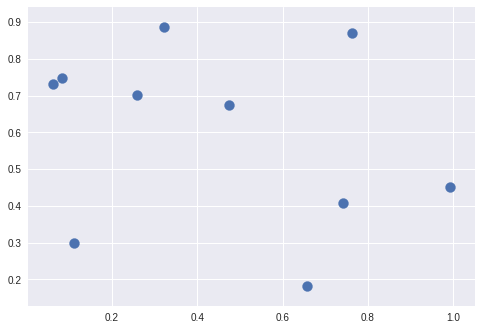

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() #plot styling
plt.scatter(X[:,0], X[:, 1], s=100)

Now we wish to compute the distance from each pair of points. We know from linear algebra that the distance between two points is:

$$d = \sqrt {\left( {x_1 - x_2 } \right)^2 + \left( {y_1 - y_2 } \right)^2}$$

How do we translate this to code? And how do we do it so that the information stays encoded in a matrix? The matrix will allow for efficient calculation and storage since we know these operations are *vectorized*.

We wish to compute the matrix of *squared* distances.

In [12]:
# for each pair of points, compute differences in their coordinates
differences = X[:,np.newaxis, :] - X[np.newaxis, :, :]
differences.shape

(10, 10, 2)

If we were to print out the differences matrix, it would be a three dimensional matrix with the distance from every point to every point. Now we wish to square the coordinate differences and sum then to get the distance squared.
$$d^2$$

In [13]:
#square coordinate differences
sq_differences = differences ** 2

#sum the coordinate differences to get the squared distance.
#sum(axis=-1) implies the sum counts from last to first axis
#sum() returns matrix with specified axis removed

dist_sq = sq_differences.sum(-1)
dist_sq.shape

(10, 10)

A 10x10 matrix is a matrix with the distance from each point to each point encoded. For example the distance from the first point in the 10x2 array to the second point is the distance is position [1,2] in the dist_sq array.

To verify the distances are correct, we examine the diagonal of the dist_sq matrix. Since the distances from each point to the same point should be zero, it follows that the diagonal should be zero.

In [14]:
dist_sq.diagonal()

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

It works! Since we are just concerned with the nearest neighbors and not neccesarily the exact distances from each point we can use np.argsort() to find the *indices* of the nearest neighbors for each point.

Sorting along each row so left most column will give the nearest neighbor.

In [15]:
nearest = np.argsort(dist_sq, axis=1)
nearest

array([[0, 2, 5, 8, 9, 3, 6, 4, 7, 1],
       [1, 3, 7, 6, 2, 4, 5, 8, 0, 9],
       [2, 3, 5, 0, 8, 6, 7, 1, 4, 9],
       [3, 6, 5, 7, 2, 1, 0, 8, 4, 9],
       [4, 8, 9, 2, 1, 3, 0, 5, 6, 7],
       [5, 3, 2, 6, 7, 0, 1, 8, 4, 9],
       [6, 7, 3, 5, 2, 1, 0, 8, 4, 9],
       [7, 6, 3, 5, 2, 1, 0, 8, 4, 9],
       [8, 4, 9, 2, 0, 3, 5, 1, 6, 7],
       [9, 8, 4, 0, 2, 3, 5, 1, 6, 7]])

The left most column is 0 - 9 since each point is always gonna be closest to itself! However we wanted to know the k-nearest neighbors, this previous operation has actually given us more information than we need! 

All we have to do to find k-nearest neighbors is to partition each row for k+1 values.

This is done with the np.argpartition() function

In [16]:
#if we want to find the three nearest neighbors
k = 3
nearest_partition = np.argpartition(dist_sq, k + 1, axis=1)

Now lets plot the points along the k-nearest neighbors

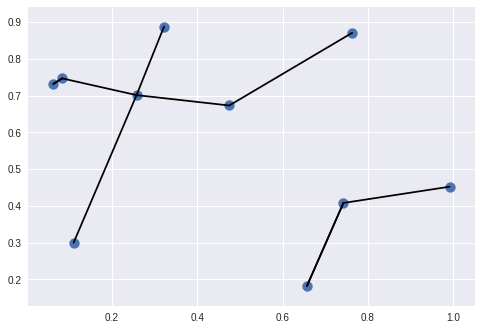

In [17]:
plt.scatter(X[:,0], X[:,1], s=100)

#let k=1 to find nearest neighbor
k=1

for i in range(X.shape[0]):
    for j in nearest[i, :k+1]:
        #plot line from X[i] to X[j]
        plt.plot(*zip(X[j], X[i]), color='black')

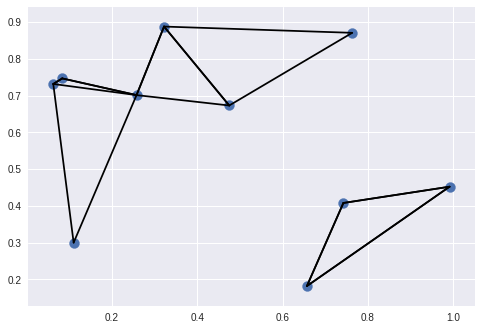

In [18]:
plt.scatter(X[:,0], X[:,1], s=100)

#let k=2 to find two nearest neighbors
k=2

for i in range(X.shape[0]):
    for j in nearest[i, :k+1]:
        #plot line from X[i] to X[j]
        plt.plot(*zip(X[j], X[i]), color='black')